In [3]:
import pandas as pd
import datetime as dt
import xgboost as xgb

In [4]:
df = pd.read_csv('fraudTrain.csv')

In [5]:
df_test = pd.read_csv('fraudTest.csv')

In [6]:
len(df)

1296675

In [7]:
df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year
df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
df['day']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
df['month']=pd.to_datetime(df['trans_date_trans_time']).dt.month
train=df[['category','amt','zip','city_pop','age','hour','day','month','is_fraud']]
train=pd.get_dummies(train, drop_first=True)
y_train = train['is_fraud']
y_train_values=y_train.values
X_train=train.drop("is_fraud", axis='columns')
X_train_values=X_train.values

In [8]:
X_train

,amt,zip,city_pop,age,hour,day,month,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,28654,3495,35,0,1,1,False,False,False,False,False,False,False,True,False,False,False,False,False
1,107.23,99160,149,45,0,1,1,False,False,False,True,False,False,False,False,False,False,False,False,False
2,220.11,83252,4154,61,0,1,1,False,False,False,False,False,False,False,False,False,False,False,False,False
3,45.00,59632,1939,56,0,1,1,False,True,False,False,False,False,False,False,False,False,False,False,False
4,41.96,24433,99,37,0,1,1,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,84735,258,62,12,6,6,False,False,False,False,False,False,False,False,False,False,False,False,False
1296671,51.70,21790,100,44,12,6,6,True,False,False,False,False,False,False,False,False,False,False,False,False
1296672,105.93,88325,899,56,12,6,6,True,False,False,False,False,False,False,False,False,False,False,False,False
1296673,74.90,57756,1126,43,12,6,6,True,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
model = xgb.XGBRegressor()
model.fit(X_train_values, y_train_values)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [10]:
# Save model
import pickle
pickle.dump(model, open("model.pkl", "wb"))

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
[13:44:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


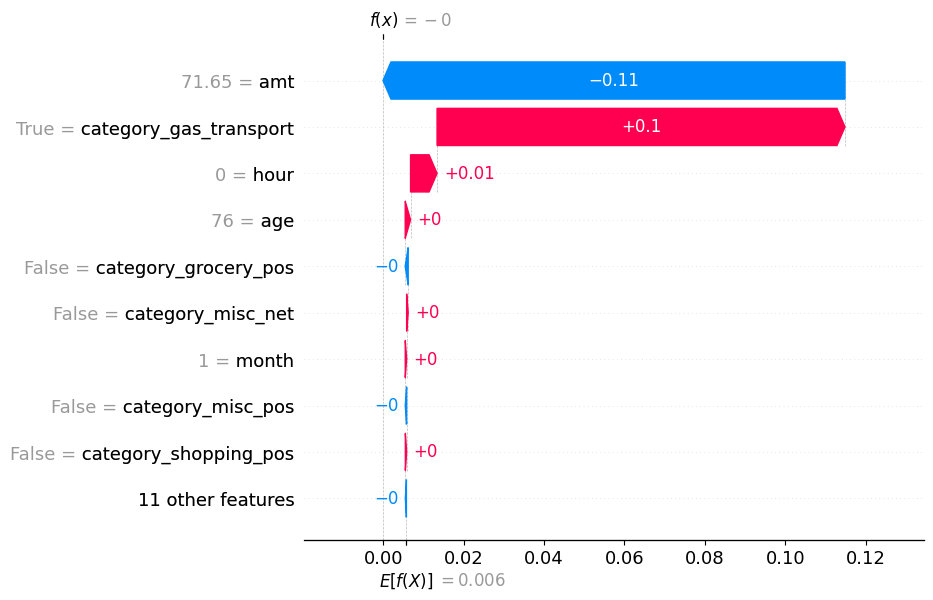

In [11]:
from shap import Explainer, Explanation, waterfall_plot

explainer = Explainer(model)
sv = explainer(X_train[:10000])
exp = Explanation(sv, sv.base_values, X_train, feature_names=X_train.columns)
idx = 7
waterfall_plot(exp[idx])

In [12]:
# Plot classification matrix of test data
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_pred = model.predict(X_train_values)
print(f"Max prediction: {y_pred.max()}")
print(f"Min prediction: {y_pred.min()}")
y_pred = y_pred > 0
cm = confusion_matrix(y_train_values, y_pred)
# Convert cm to percentages
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Plot
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2%')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
exp[idx]

.values =
array([-1.14118867e-01,  6.72249403e-03, -1.33122820e-02,  1.01059326e-04,
        2.31864920e-04,  6.88738283e-03, -9.99158947e-04,  4.43562109e-04,
        7.24292872e-03,  2.04208030e-04,  8.40569672e-04, -3.39650171e-04,
        9.99383777e-02, -1.41024706e-04, -7.58643670e-04, -4.35453831e-06,
       -5.32273225e-05, -5.37830783e-05,  4.14708193e-04, -3.19305400e-04,
       -1.00853991e-04,  1.36090530e-04,  2.21397902e-04,  2.63281399e-04],
      dtype=float32)

.base_values =
0.00578808

.data =
array([71.65, 22824, 38.8432, -78.6003, 6018, 38.948089, -78.540296, 76,
       0, 1, 1, False, True, False, False, False, False, False, False,
       False, False, False, False, False], dtype=object)

In [ ]:
import pickle

# dump exp[idx]
with open('exp.pkl', 'wb') as f:
    pickle.dump(exp[idx], f)

In [ ]:
# Load exp[idx]
with open('exp.pkl', 'rb') as f:
    exp = pickle.load(f)

exp

.values =
array([-1.14118867e-01,  6.72249403e-03, -1.33122820e-02,  1.01059326e-04,
        2.31864920e-04,  6.88738283e-03, -9.99158947e-04,  4.43562109e-04,
        7.24292872e-03,  2.04208030e-04,  8.40569672e-04, -3.39650171e-04,
        9.99383777e-02, -1.41024706e-04, -7.58643670e-04, -4.35453831e-06,
       -5.32273225e-05, -5.37830783e-05,  4.14708193e-04, -3.19305400e-04,
       -1.00853991e-04,  1.36090530e-04,  2.21397902e-04,  2.63281399e-04],
      dtype=float32)

.base_values =
0.00578808

.data =
array([71.65, 22824, 38.8432, -78.6003, 6018, 38.948089, -78.540296, 76,
       0, 1, 1, False, True, False, False, False, False, False, False,
       False, False, False, False, False], dtype=object)

In [ ]:
exp.values

array([-1.14118867e-01,  6.72249403e-03, -1.33122820e-02,  1.01059326e-04,
        2.31864920e-04,  6.88738283e-03, -9.99158947e-04,  4.43562109e-04,
        7.24292872e-03,  2.04208030e-04,  8.40569672e-04, -3.39650171e-04,
        9.99383777e-02, -1.41024706e-04, -7.58643670e-04, -4.35453831e-06,
       -5.32273225e-05, -5.37830783e-05,  4.14708193e-04, -3.19305400e-04,
       -1.00853991e-04,  1.36090530e-04,  2.21397902e-04,  2.63281399e-04],
      dtype=float32)

In [ ]:
X_train.columns

Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
       'age', 'hour', 'day', 'month', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel'],
      dtype='object')